<a href="https://colab.research.google.com/github/fanegass/Problem-Set-2/blob/main/problem%20set%202%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YTM anual: 0.2521%


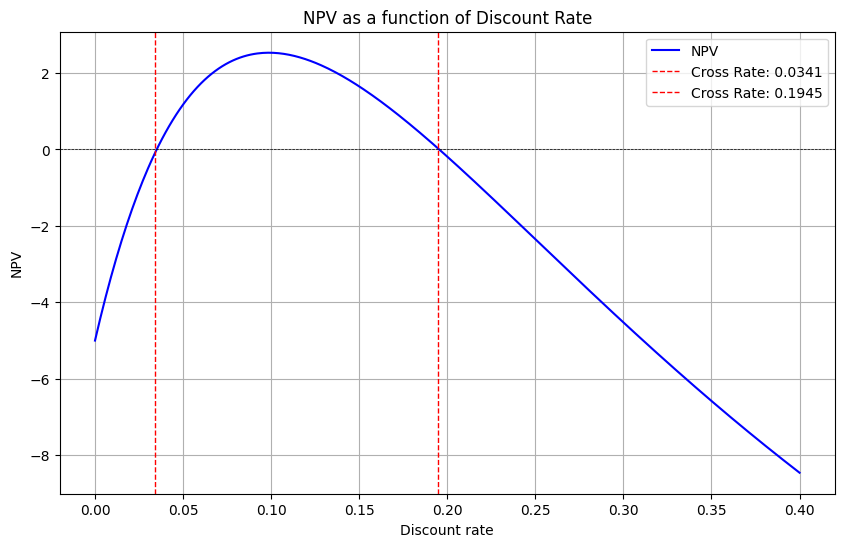

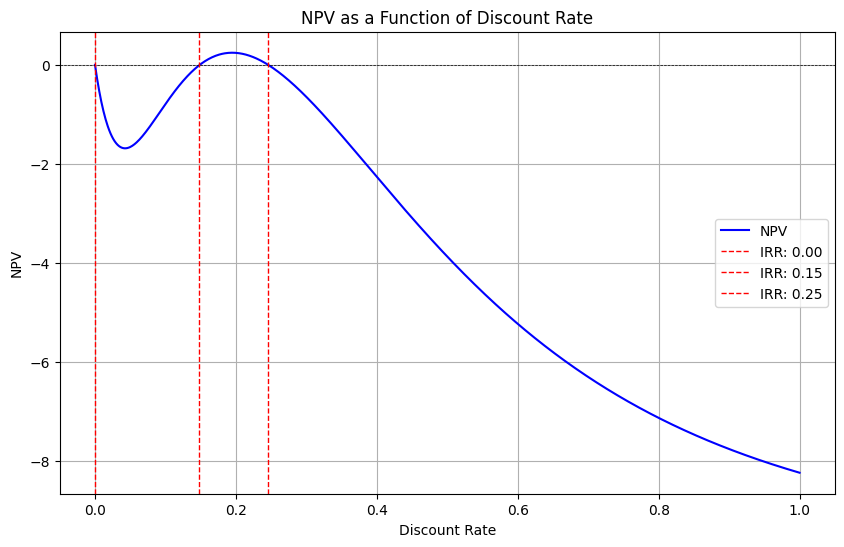

Internal Rates of Return (IRR) found:
IRR: 0.0000 or 0.00%
IRR: 0.1481 or 14.81%
IRR: 0.2452 or 24.52%
Recommendation: Invest in the project (at least one IRR > opportunity cost).


In [ ]:
!pip install numpy-financial
import numpy_financial as npf

!pip install numpy
import numpy as np

# Computational exercise
from scipy.optimize import fsolve

face_value = 1000
coupon_rate = 0.025
coupon_payment = (coupon_rate * face_value) / 2
bond_price = 108.941 / 100 * face_value
periods = 8

def ytm_equation(r):
    return sum([coupon_payment / (1 + r) ** t for t in range(1, periods + 1)]) + face_value / (1 + r) ** periods - bond_price

ytm_semiannual = fsolve(ytm_equation, 0.01)[0]  # Initial value: 1%
ytm_annual = ytm_semiannual * 2

print(f"YTM anual: {ytm_annual * 100:.4f}%")
# Replication exercise
import numpy as np
import matplotlib.pyplot as plt

def calculate_npv(flows, discount_rate):
    return sum(cf / (1 + discount_rate) ** t for t, cf in enumerate(flows))

flows = [-30, 10, 10, 10, 10, 10, 10, 10, 10, 10, -65]

discount_rate = np.linspace(0, 0.4, 400)
npv_values = [calculate_npv(flows, rates) for rates in discount_rate]

cero_crosses = np.where(np.diff(np.sign(npv_values)))[0]

plt.figure(figsize=(10, 6))
plt.plot(discount_rate, npv_values, label='NPV', color='blue')

for cross in cero_crosses:
    cross_rate = discount_rate[cross]
    plt.axvline(cross_rate, color='red', linestyle='--', linewidth=1, label=f'Cross Rate: {cross_rate:.4f}')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.title('NPV as a function of Discount Rate')
plt.xlabel('Discount rate')
plt.ylabel('NPV')
plt.grid(True)
plt.legend()
plt.show()

# Decision-making exercise
#(i)
import numpy as np
import matplotlib.pyplot as plt

def calculate_npv(cash_flows, discount_rate):
    return sum(cf / (1 + discount_rate) ** t for t, cf in enumerate(cash_flows))

cash_flows = [-10, 0, 0 ,0 ,0, 60, 0, 0, 0, 0, -110,0,0,0,0,60]

discount_rates = np.linspace(0, 1.0, 1000)
npv_values = [calculate_npv(cash_flows, rate) for rate in discount_rates]

zero_crossings = np.where(np.diff(np.sign(npv_values)))[0]
irr_values = [discount_rates[crossing] for crossing in zero_crossings]

plt.figure(figsize=(10, 6))
plt.plot(discount_rates, npv_values, label='NPV', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

for irr in irr_values:
    plt.axvline(irr, color='red', linestyle='--', linewidth=1, label=f'IRR: {irr:.2f}')

plt.title('NPV as a Function of Discount Rate')
plt.xlabel('Discount Rate')
plt.ylabel('NPV')
plt.grid(True)
plt.legend()
plt.show()

print("Internal Rates of Return (IRR) found:")
for irr in irr_values:
    print(f"IRR: {irr:.4f} or {irr*100:.2f}%")

#(ii)

opportunity_cost = 0.05

if any(irr > opportunity_cost for irr in irr_values):
    print("Recommendation: Invest in the project (at least one IRR > opportunity cost).")
else:
    print("Recommendation: Do not invest in the project (all IRRs ≤ opportunity cost).")